In this notebook, we demonstrate how to align two annotated brains.

In [1]:
%load_ext autoreload
%autoreload 2

import sys
import os
import time

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

sys.path.append(os.environ['REPO_DIR'] + '/utilities')
from utilities2015 import *
from registration_utilities import *
from data_manager import *
from metadata import *

Setting environment for Local Macbook Pro


The annotated brains are volumes of the type "annotationAsScore".

They are reconstructed based on annotation files.
Refer to `reconstruct/construct_annotationVolume_from_annotationFiles_v4.ipynb`

In [2]:
stack_m_spec = dict(
#     name='MD594',
    name='MD585',
                   vol_type='annotationAsScore',
                   detector_id=None,
                   prep_id=None,
                   structure=None,
                   resolution='10.0um')

stack_f_spec = dict(name='MD589',
                   vol_type='annotationAsScore',
                   detector_id=None,
                   prep_id=None,
                   structure=None,
                   resolution='10.0um')

midsagittal_alignment_spec = dict(stack_m=stack_m_spec, 
                      stack_f=stack_f_spec,
                      warp_setting=8)

In [7]:
midsagittal_aligner_parameters = generate_aligner_parameters_v2(alignment_spec=midsagittal_alignment_spec,
structures_m=['5N_L', '5N_R', '6N_L', '6N_R', '7N_L', '7N_R', '7n_L', '7n_R', 'Amb_L', 'Amb_R', 'LC_L', 'LC_R', 'LRt_L', 'LRt_R', 'Pn_L', 'Pn_R', 'Tz_L', 'Tz_R', 'VLL_L', 'VLL_R', 'RMC_L', 'RMC_R', 'SNC_L', 'SNC_R', 'SNR_L', 'SNR_R', '3N_L', '3N_R', '4N_L', '4N_R', 'Sp5C_L', 'Sp5C_R', 'PBG_L', 'PBG_R', '10N_L', '10N_R', 'VCA_L', 'VCA_R', 'VCP_L', 'VCP_R', 'DC_L', 'DC_R', 'AP', '12N', 'SC', 'IC'],
structures_f=['5N_L', '5N_R', '6N_L', '6N_R', '7N_L', '7N_R', '7n_L', '7n_R', 'Amb_L', 'Amb_R', 'LC_L', 'LC_R', 'LRt_L', 'LRt_R', 'Pn_L', 'Pn_R', 'Tz_L', 'Tz_R', 'VLL_L', 'VLL_R', 'RMC_L', 'RMC_R', 'SNC_L', 'SNC_R', 'SNR_L', 'SNR_R', '3N_L', '3N_R', '4N_L', '4N_R', 'Sp5C_L', 'Sp5C_R', 'PBG_L', 'PBG_R', '10N_L', '10N_R', 'VCA_L', 'VCA_R', 'VCP_L', 'VCP_R', 'DC_L', 'DC_R', 'AP', '12N', 'SC', 'IC']
# structures_m=['5N_L', '5N_R', '7N_L', '7N_R', '7n_L', '7n_R', 'LC_L', 'LC_R', 'LRt_L', 'LRt_R', 'Pn_L', 'Pn_R', 'Tz_L', 'Tz_R', 'VLL_L', 'VLL_R', 'SNR_L', 'SNR_R', 'Sp5C_L', 'Sp5C_R', '12N', 'SC', 'IC']
# structures_m=['5N_L', '5N_R', '6N_L', '6N_R', '7N_L', '7N_R']
# structures_m=['5N_L', '7N_L', '7n_L', 'LC_L',  'LRt_L', 'Pn_L', 'Tz_L', 'VLL_L',  'SNR_L', 'Sp5C_L', '12N', 'SC', 'IC'],
# structures_f=['5N_L', '7N_L', '7n_L', 'LC_L',  'LRt_L', 'Pn_L', 'Tz_L', 'VLL_L',  'SNR_L', 'Sp5C_L', '12N', 'SC', 'IC']
)

upstream_warp_id                                       None
transform_type                                        rigid
terminate_thresh                                      1e-06
grad_computation_sample_number                       100000
grid_search_sample_number                             10000
std_tx_um                                               200
std_ty_um                                               200
std_tz_um                                               200
std_theta_xy_degree                                      30
surround_weight                                         NaN
regularization_weight                                     0
comment                           align mid-sagittal planes
max_iter_num                                            NaN
Name: 8, dtype: object
surround nan False
rm -rf "/media/yuncong/YuncongPublic/CSHL_volumes/MD585/MD585_10.0um_annotationAsScoreVolume/score_volumes/MD585_10.0um_annotationAsScoreVolume_Sp5C_R.bp" && mkdir -p "/media/yun

Prior structure/index map not found. Generating a new one.


1


File does not exist: /media/yuncong/YuncongPublic/CSHL_volumes/MD585/MD585_10.0um_annotationAsScoreVolume/score_volumes/MD585_10.0um_annotationAsScoreVolume_Sp5C_R.bp
Score volume for Sp5C_R does not exist.
Loaded moving volumes: ['10N_L', '10N_R', '12N', '3N_L', '3N_R', '4N_L', '4N_R', '5N_L', '5N_R', '6N_L', '6N_R', '7N_L', '7N_R', '7n_L', '7n_R', 'AP', 'Amb_L', 'Amb_R', 'DC_L', 'DC_R', 'IC', 'LC_L', 'LC_R', 'LRt_L', 'LRt_R', 'PBG_L', 'PBG_R', 'Pn_L', 'Pn_R', 'RMC_L', 'RMC_R', 'SC', 'SNC_L', 'SNC_R', 'SNR_L', 'SNR_R', 'Sp5C_L', 'Tz_L', 'Tz_R', 'VCA_L', 'VCA_R', 'VCP_L', 'VCP_R', 'VLL_L', 'VLL_R'].
Prior structure/index map not found. Generating a new one.


voxel size for moving = 10.00 um
voxel size for fixed = 10.00 um


Loaded fixed volumes: ['10N_L', '10N_R', '12N', '3N_L', '3N_R', '4N_L', '4N_R', '5N_L', '5N_R', '6N_L', '6N_R', '7N_L', '7N_R', '7n_L', '7n_R', 'AP', 'Amb_L', 'Amb_R', 'DC_L', 'DC_R', 'IC', 'LC_L', 'LC_R', 'LRt_L', 'LRt_R', 'PBG_L', 'PBG_R', 'Pn_L', 'Pn_R', 'RMC_L', 'RMC_R', 'SC', 'SNC_L', 'SNC_R', 'SNR_L', 'SNR_R', 'Sp5C_L', 'Sp5C_R', 'Tz_L', 'Tz_R', 'VCA_L', 'VCA_R', 'VCP_L', 'VCP_R', 'VLL_L', 'VLL_R'].


In [8]:
volume_fixed = midsagittal_aligner_parameters['volume_fixed']
volume_moving = midsagittal_aligner_parameters['volume_moving']

# Align mid-sagittal planes

We first compute the center-of-mass of every structure in both brains.

In [9]:
structure_centroids_fixed_rel2fixedWholebrain = {midsagittal_aligner_parameters['label_to_structure_fixed'][i]: c for i, c in get_structure_centroids(vol_origin_dict=volume_fixed).iteritems()}
structure_centroids_moving_rel2movingWholebrain = {midsagittal_aligner_parameters['label_to_structure_moving'][i]: c for i, c in get_structure_centroids(vol_origin_dict=volume_moving).iteritems()}

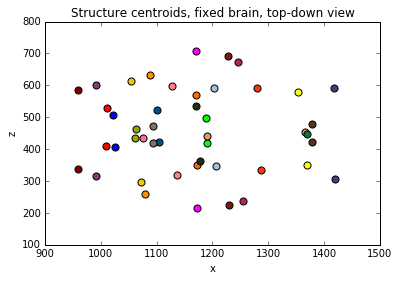

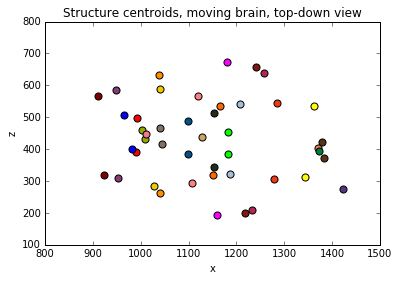

In [10]:
for label, c in structure_centroids_fixed_rel2fixedWholebrain.iteritems():
    plt.scatter(c[0], c[2], c=np.array(name_unsided_to_color[convert_to_original_name(label)])/255., marker='o', s=50)
plt.xlabel('x');
plt.ylabel('z');
plt.title('Structure centroids, fixed brain, top-down view');
plt.show()
    
for label, c in structure_centroids_moving_rel2movingWholebrain.iteritems():
    plt.scatter(c[0], c[2], c=np.array(name_unsided_to_color[convert_to_original_name(label)])/255., marker='o', s=50)
plt.xlabel('x');
plt.ylabel('z');
plt.title('Structure centroids, moving brain, top-down view');
plt.show()

Then for each brain, compute the midway point of every pair and fit a plane to the set of midway points.

In [11]:
midplane_points_fixed_rel2fixedWholebrain = compute_midpoints(structure_centroids_fixed_rel2fixedWholebrain)
midplane_vector_fixed, midplane_centroid_fixed_rel2fixedWholebrain = fit_plane(midplane_points_fixed_rel2fixedWholebrain.values())

print 'mid-sagittal plane normal =', midplane_vector_fixed
print 'mid-sagittal plane centroid =', midplane_centroid_fixed_rel2fixedWholebrain

mid-sagittal plane normal = [ 0.03639325 -0.09139192  0.99514976]
mid-sagittal plane centroid = [ 1173.9775392    547.80293053   455.61576123]


In [12]:
midplane_points_moving_rel2movingWholebrain = compute_midpoints(structure_centroids_moving_rel2movingWholebrain)
midplane_vector_moving, midplane_centroid_moving_rel2movingWholebrain = fit_plane(midplane_points_moving_rel2movingWholebrain.values())

print 'mid-sagittal plane normal =', midplane_vector_moving
print 'mid-sagittal plane centroid =', midplane_centroid_moving_rel2movingWholebrain

mid-sagittal plane normal = [ 0.09917409  0.00550361  0.99505488]
mid-sagittal plane centroid = [ 1141.88256676   514.27834994   431.13129227]


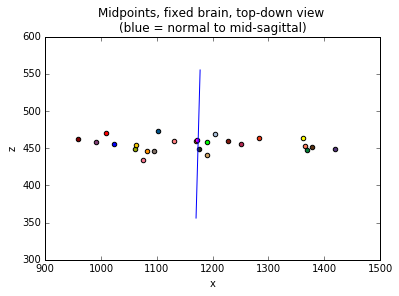

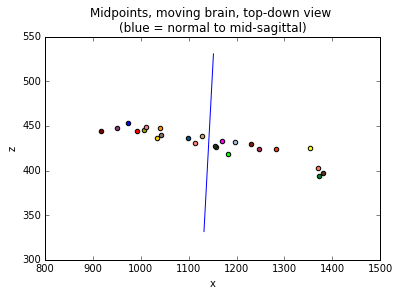

In [13]:
for name_u, c in midplane_points_fixed_rel2fixedWholebrain.iteritems():
    plt.scatter(c[0], c[2], c=np.array(name_unsided_to_color[name_u])/255., marker='o')
    
d = 100
e1 = midplane_centroid_fixed_rel2fixedWholebrain - midplane_vector_fixed * d
e2 = midplane_centroid_fixed_rel2fixedWholebrain + midplane_vector_fixed * d
plt.plot([e1[0], e2[0]], [e1[2], e2[2]])
    
plt.xlabel('x');
plt.ylabel('z');
plt.title('Midpoints, fixed brain, top-down view \n(blue = normal to mid-sagittal)');
plt.show()

####################

for name_u, c in midplane_points_moving_rel2movingWholebrain.iteritems():
    plt.scatter(c[0], c[2], c=np.array(name_unsided_to_color[name_u])/255., marker='o')

d = 100
e1 = midplane_centroid_moving_rel2movingWholebrain - midplane_vector_moving * d
e2 = midplane_centroid_moving_rel2movingWholebrain + midplane_vector_moving * d
plt.plot([e1[0], e2[0]], [e1[2], e2[2]])
    
plt.xlabel('x');
plt.ylabel('z');
plt.title('Midpoints, moving brain, top-down view \n(blue = normal to mid-sagittal)');
plt.show()

Compute the rotation for the moving brain that aligns the two mid-planes in both brains.

In [14]:
R = R_align_two_vectors(midplane_vector_moving, midplane_vector_fixed)

In [15]:
T_align_midplane = np.zeros((3,4))
T_align_midplane[:3, :3] = R
T_align_midplane = T_align_midplane.flatten()

# print T_align_midplane.reshape((3,4))

transform_parameters_midplane_aligned = {
    'parameters': T_align_midplane,
    'centroid_m_wrt_wholebrain': midplane_centroid_moving_rel2movingWholebrain,
    'centroid_f_wrt_wholebrain': midplane_centroid_fixed_rel2fixedWholebrain
}

transform_matrix_midplane_aligned = alignment_parameters_to_transform_matrix_v2(transform_parameters=transform_parameters_midplane_aligned)
print transform_matrix_midplane_aligned

[[  9.97998904e-01   6.24240434e-03  -6.29278158e-02   5.82998063e+01]
 [ -1.22856065e-02   9.95294111e-01  -9.61265722e-02   9.14166104e+01]
 [  6.20317781e-02   9.67072200e-02   9.93379109e-01  -9.32284933e+01]]


Apply the rotation to the moving brain.

In [16]:
volume_moving_midplaneAligned_rel2fixedWholebrain = \
{label_s: transform_volume_v3(vol=vol.astype(np.int), 
                              origin=origin,
                              transform_parameters=transform_parameters_midplane_aligned,
                              return_origin_instead_of_bbox=True) 
 for label_s, (vol, origin) in volume_moving.iteritems()}

Interpolating/filling sparse volume: 0.10 seconds.
Interpolating/filling sparse volume: 0.08 seconds.
Interpolating/filling sparse volume: 0.01 seconds.
Interpolating/filling sparse volume: 0.01 seconds.
Interpolating/filling sparse volume: 0.12 seconds.
Interpolating/filling sparse volume: 0.15 seconds.
Interpolating/filling sparse volume: 0.37 seconds.
Interpolating/filling sparse volume: 0.27 seconds.
Interpolating/filling sparse volume: 0.02 seconds.
Interpolating/filling sparse volume: 0.02 seconds.
Interpolating/filling sparse volume: 0.05 seconds.
Interpolating/filling sparse volume: 0.05 seconds.
Interpolating/filling sparse volume: 0.21 seconds.
Interpolating/filling sparse volume: 0.18 seconds.
Interpolating/filling sparse volume: 0.25 seconds.
Interpolating/filling sparse volume: 0.23 seconds.
Interpolating/filling sparse volume: 0.07 seconds.
Interpolating/filling sparse volume: 0.07 seconds.
Interpolating/filling sparse volume: 0.32 seconds.
Interpolating/filling sparse vo

Visualize the center-of-masses after rotation.

In [17]:
structure_centroids_m_midplaneAligned_rel2fixedWholebrain = \
{midsagittal_aligner_parameters['label_to_structure_moving'][i]: c 
 for i, c in get_structure_centroids(vol_origin_dict=volume_moving_midplaneAligned_rel2fixedWholebrain).iteritems()}

In [18]:
midplane_points_m_midplaneAligned_rel2fixedWholebrain = \
compute_midpoints(structure_centroids_m_midplaneAligned_rel2fixedWholebrain)

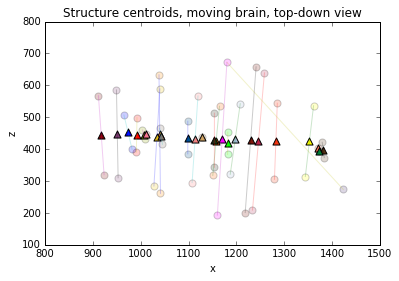

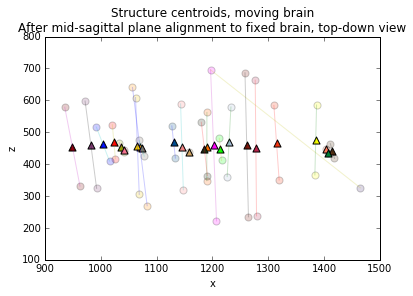

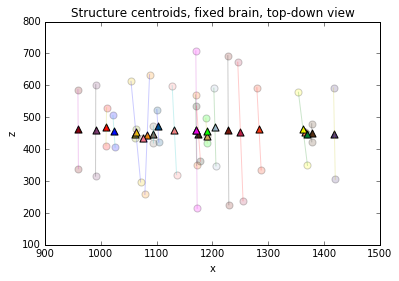

In [19]:
for name_s, c in structure_centroids_moving_rel2movingWholebrain.iteritems():
    plt.scatter(c[0], c[2], c=np.array(name_unsided_to_color[convert_to_original_name(name_s)])/255., 
                marker='o', alpha=.2, s=50)
    
for name_u, c in midplane_points_moving_rel2movingWholebrain.iteritems():
    plt.scatter(c[0], c[2], c=np.array(name_unsided_to_color[name_u])/255., marker='^', s=50)
    
for name_u in set([convert_to_original_name(name_s) 
                   for name_s in structure_centroids_moving_rel2movingWholebrain.keys()]):
    if name_u not in singular_structures:
        name_l = convert_to_left_name(name_u)
        name_r = convert_to_right_name(name_u)
        if name_l in structure_centroids_moving_rel2movingWholebrain:
            e1 = structure_centroids_moving_rel2movingWholebrain[name_l]
        if name_r in structure_centroids_moving_rel2movingWholebrain:
            e2 = structure_centroids_moving_rel2movingWholebrain[name_r]
        plt.plot((e1[0], e2[0]), (e1[2], e2[2]), alpha=.2);
    
plt.xlabel('x');
plt.ylabel('z');
plt.title('Structure centroids, moving brain, top-down view');
plt.show()

##########################################################

for name_s, c in structure_centroids_m_midplaneAligned_rel2fixedWholebrain.iteritems():
    plt.scatter(c[0], c[2], c=np.array(name_unsided_to_color[convert_to_original_name(name_s)])/255., 
                marker='o', alpha=.2, s=50)

for name_u, c in midplane_points_m_midplaneAligned_rel2fixedWholebrain.iteritems():
    plt.scatter(c[0], c[2], c=np.array(name_unsided_to_color[name_u])/255., marker='^', s=50)
    
for name_u in set([convert_to_original_name(name_s) 
                   for name_s in structure_centroids_m_midplaneAligned_rel2fixedWholebrain.keys()]):
    if name_u not in singular_structures:
        name_l = convert_to_left_name(name_u)
        name_r = convert_to_right_name(name_u)
        if name_l in structure_centroids_m_midplaneAligned_rel2fixedWholebrain:
            e1 = structure_centroids_m_midplaneAligned_rel2fixedWholebrain[name_l]
        if name_r in structure_centroids_m_midplaneAligned_rel2fixedWholebrain:
            e2 = structure_centroids_m_midplaneAligned_rel2fixedWholebrain[name_r]
        plt.plot((e1[0], e2[0]), (e1[2], e2[2]), alpha=.2);   
    
    
plt.xlabel('x');
plt.ylabel('z');
plt.title('Structure centroids, moving brain\nAfter mid-sagittal plane alignment to fixed brain, top-down view');
plt.show()

##########################################################

for name_s, c in structure_centroids_fixed_rel2fixedWholebrain.iteritems():
    plt.scatter(c[0], c[2], c=np.array(name_unsided_to_color[convert_to_original_name(name_s)])/255., 
                marker='o', alpha=.2, s=50)
    
for name_u, c in midplane_points_fixed_rel2fixedWholebrain.iteritems():
    plt.scatter(c[0], c[2], c=np.array(name_unsided_to_color[name_u])/255., marker='^', s=50)
    
for name_u in set([convert_to_original_name(name_s) 
                   for name_s in structure_centroids_fixed_rel2fixedWholebrain.keys()]):
    if name_u not in singular_structures:
        name_l = convert_to_left_name(name_u)
        name_r = convert_to_right_name(name_u)
        if name_l in structure_centroids_fixed_rel2fixedWholebrain:
            e1 = structure_centroids_fixed_rel2fixedWholebrain[name_l]
        if name_r in structure_centroids_fixed_rel2fixedWholebrain:
            e2 = structure_centroids_fixed_rel2fixedWholebrain[name_r]
        plt.plot((e1[0], e2[0]), (e1[2], e2[2]), alpha=.2);
    
plt.xlabel('x');
plt.ylabel('z');
plt.title('Structure centroids, fixed brain, top-down view');
plt.show()

In [17]:
# for name_s in all_known_structures_sided:
    
#     print name_s
    
#     try:
#         volume, origin_wrt_wholebrain = \
#             DataManager.load_original_volume_v2(stack_spec=stack_m_spec, 
#                                                    structure=name_s,
#                                                   resolution='10.0um',
#                                                   return_origin_instead_of_bbox=True)

#     except:
#         sys.stderr.write("Cannot load moving brain for %s\n" % name_s)
#         continue
            
#     vol, bbox_wrt_fixedWholebrain = \
#     transform_volume_v3(vol=volume.astype(np.int), 
#                         origin=origin_wrt_wholebrain,
#                       tf_params=T_align_midplane, 
#                       centroid_m=midplane_centroid_moving_rel2movingWholebrain,
#                       centroid_f=midplane_centroid_fixed_rel2fixedWholebrain,
#                              return_origin_instead_of_bbox=False)
    
#     vol_fp = DataManager.get_transformed_volume_filepath_v2(midsagittal_alignment_spec, structure=name_s)
#     create_parent_dir_if_not_exists(vol_fp)
#     bp.pack_ndarray_file(vol, vol_fp)
#     upload_to_s3(vol_fp)
    
#     bbox_fp = \
#     DataManager.get_transformed_volume_bbox_filepath_v2(midsagittal_alignment_spec, 
#                                                         structure=name_s, 
#                                                         wrt='fixedWholebrain')
#     create_parent_dir_if_not_exists(bbox_fp)
#     np.savetxt(bbox_fp, bbox_wrt_fixedWholebrain)
#     upload_to_s3(bbox_fp)

# Affine registration, under the constaint that mid-sagittal plane is aligned.

In [19]:
# warp_setting = 9

In [48]:
# v, o = volume_moving[local_aligner_parameters['structure_to_label_moving'][structure_m]]
# init_shift_wrt_movingWholebrain = get_centroid_3d(v) + o
# init_shift_wrt_fixedWholebrain = transform_points_by_transform_parameters_v2(pts=[init_shift_wrt_movingWholebrain],
# transform_parameters=global_transform_parameters)[0]

# print init_shift_wrt_movingWholebrain, init_shift_wrt_fixedWholebrain

In [20]:
affine_alignment_spec = dict(stack_m=stack_m_spec, 
                            stack_f=stack_f_spec,
                            warp_setting=109)

In [21]:
affine_aligner_parameters = generate_aligner_parameters_v2(alignment_spec=affine_alignment_spec,
structures_m=['5N_L', '5N_R', '6N_L', '6N_R', '7N_L', '7N_R', '7n_L', '7n_R', 'Amb_L', 'Amb_R', 'LC_L', 'LC_R', 'LRt_L', 'LRt_R', 'Pn_L', 'Pn_R', 'Tz_L', 'Tz_R', 'VLL_L', 'VLL_R', 'RMC_L', 'RMC_R', 'SNC_L', 'SNC_R', 'SNR_L', 'SNR_R', '3N_L', '3N_R', '4N_L', '4N_R', 'Sp5C_L', 'Sp5C_R', 'PBG_L', 'PBG_R', '10N_L', '10N_R', 'VCA_L', 'VCA_R', 'VCP_L', 'VCP_R', 'DC_L', 'DC_R', 'AP', '12N', 'SC', 'IC'],
structures_f=['5N_L', '5N_R', '6N_L', '6N_R', '7N_L', '7N_R', '7n_L', '7n_R', 'Amb_L', 'Amb_R', 'LC_L', 'LC_R', 'LRt_L', 'LRt_R', 'Pn_L', 'Pn_R', 'Tz_L', 'Tz_R', 'VLL_L', 'VLL_R', 'RMC_L', 'RMC_R', 'SNC_L', 'SNC_R', 'SNR_L', 'SNR_R', '3N_L', '3N_R', '4N_L', '4N_R', 'Sp5C_L', 'Sp5C_R', 'PBG_L', 'PBG_R', '10N_L', '10N_R', 'VCA_L', 'VCA_R', 'VCP_L', 'VCP_R', 'DC_L', 'DC_R', 'AP', '12N', 'SC', 'IC'],
)

upstream_warp_id                                                               None
transform_type                                                                rigid
terminate_thresh                                                              1e-06
grad_computation_sample_number                                               100000
grid_search_sample_number                                                     10000
std_tx_um                                                                      2000
std_ty_um                                                                      2000
std_tz_um                                                                      2000
std_theta_xy_degree                                                              30
surround_weight                                                                 NaN
regularization_weight                                                           NaN
comment                           global registration given mid-sagittal pla

Prior structure/index map not found. Generating a new one.


1
voxel size for moving = 10.00 um
voxel size for fixed = 10.00 um


File does not exist: /media/yuncong/YuncongPublic/CSHL_volumes/MD585/MD585_10.0um_annotationAsScoreVolume/score_volumes/MD585_10.0um_annotationAsScoreVolume_Sp5C_R.bp
Score volume for Sp5C_R does not exist.
Loaded moving volumes: ['10N_L', '10N_R', '12N', '3N_L', '3N_R', '4N_L', '4N_R', '5N_L', '5N_R', '6N_L', '6N_R', '7N_L', '7N_R', '7n_L', '7n_R', 'AP', 'Amb_L', 'Amb_R', 'DC_L', 'DC_R', 'IC', 'LC_L', 'LC_R', 'LRt_L', 'LRt_R', 'PBG_L', 'PBG_R', 'Pn_L', 'Pn_R', 'RMC_L', 'RMC_R', 'SC', 'SNC_L', 'SNC_R', 'SNR_L', 'SNR_R', 'Sp5C_L', 'Tz_L', 'Tz_R', 'VCA_L', 'VCA_R', 'VCP_L', 'VCP_R', 'VLL_L', 'VLL_R'].
Prior structure/index map not found. Generating a new one.
Loaded fixed volumes: ['10N_L', '10N_R', '12N', '3N_L', '3N_R', '4N_L', '4N_R', '5N_L', '5N_R', '6N_L', '6N_R', '7N_L', '7N_R', '7n_L', '7n_R', 'AP', 'Amb_L', 'Amb_R', 'DC_L', 'DC_R', 'IC', 'LC_L', 'LC_R', 'LRt_L', 'LRt_R', 'PBG_L', 'PBG_R', 'Pn_L', 'Pn_R', 'RMC_L', 'RMC_R', 'SC', 'SNC_L', 'SNC_R', 'SNR_L', 'SNR_R', 'Sp5C_L', 'Sp5C_

In [22]:
volume_fixed = affine_aligner_parameters['volume_fixed']
volume_moving = affine_aligner_parameters['volume_moving']

In [23]:
from aligner_v3 import *

In [24]:
aligner = Aligner(volume_fixed, volume_moving, labelIndexMap_m2f=affine_aligner_parameters['label_mapping_m2f'])

Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.


In [25]:
aligner.set_initial_transform(params=transform_matrix_midplane_aligned[:3].flatten())

Set initial transform to [  9.97998904e-01   6.24240434e-03  -6.29278158e-02   5.82998063e+01
  -1.22856065e-02   9.95294111e-01  -9.61265722e-02   9.14166104e+01
   6.20317781e-02   9.67072200e-02   9.93379109e-01  -9.32284933e+01].


In [26]:
# aligner.set_centroid(centroid_m=(0,0,0), centroid_f=(0,0,0))
# aligner.set_centroid(centroid_m='volume_centroid', centroid_f='centroid_m')
aligner.set_centroid(centroid_m='volume_centroid', centroid_f='volume_centroid')
# aligner.set_centroid(centroid_m=np.array([1254 , 478 , 457]), centroid_f=np.array([1224 , 483,  464]))
# aligner.set_centroid(centroid_m='structure_centroid', centroid_f='centroid_m', indices_m=[structure_to_label_moving['IC']])

centroid_m: [ 1224.46135159   481.02883798   454.23340676], centroid_f: [1222  483  464]


In [27]:
gradients_f = compute_gradient_v2(volume_fixed, smooth_first=True)
aligner.load_gradient(gradients=gradients_f)

Computing gradient for 1
Computing gradient for 2
Computing gradient for 3
Computing gradient for 4
Computing gradient for 5
Computing gradient for 6
Computing gradient for 7
Computing gradient for 8
Computing gradient for 9
Computing gradient for 10
Computing gradient for 11
Computing gradient for 12
Computing gradient for 13
Computing gradient for 14
Computing gradient for 15
Computing gradient for 16
Computing gradient for 17
Computing gradient for 18
Computing gradient for 19
Computing gradient for 20
Computing gradient for 21
Computing gradient for 22
Computing gradient for 23
Computing gradient for 24
Computing gradient for 25
Computing gradient for 26
Computing gradient for 27
Computing gradient for 28
Computing gradient for 29
Computing gradient for 30
Computing gradient for 31
Computing gradient for 32
Computing gradient for 33
Computing gradient for 34
Computing gradient for 35
Computing gradient for 36
Computing gradient for 37
Computing gradient for 38
Computing gradient fo

indices_f: set([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46])


In [28]:
aligner.set_label_weights(label_weights=affine_aligner_parameters['label_weights_m'])

In [29]:
T, scores = aligner.optimize(tf_type=affine_aligner_parameters['transform_type'], 
#                              max_iter_num=200,
                             max_iter_num=100,
                             history_len=50, 
#                              terminate_thresh=1e-4,
                             terminate_thresh_trans=.01,
                             grad_computation_sample_number=100000,
                             full_lr=np.array([10,10,0,0,0,.1]), # shift along z axis, rotations around x axis and y axis are frozen
#                              full_lr=np.array([0,0,0,0,0,0]), # Freeze shift along z axis and rotations around x axis and y axis
#                              init_T=init_T
                            )                                  
# traj = aligner.Ts


iteration 0
1: 66635 valid, 14804 out-of-bound voxels after transform.
2: 73511 valid, 14243 out-of-bound voxels after transform.
3: 0 valid, 4853 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 0 valid, 3277 out-of-bound voxels after transform.
Error computing score/gradient for 4: 4: No valid voxels after transform.
5: 72404 valid, 27596 out-of-bound voxels after transform.
6: 31552 valid, 68448 out-of-bound voxels after transform.
7: 56866 valid, 7351 out-of-bound voxels after transform.
8: 53017 valid, 10730 out-of-bound voxels after transform.
9: 0 valid, 8015 out-of-bound voxels after transform.
Error computing score/gradient for 9: 9: No valid voxels after transform.
10: 0 valid, 5732 out-of-bound voxels after transform.
Error computing score/gradient for 10: 10: No valid voxels after transform.
11: 6282 valid, 18755 out-of-bound voxels after transform.
12: 20451 valid, 8177 out-of-bound voxels after transform.
1

24: 11161 valid, 21907 out-of-bound voxels after transform.
25: 78919 valid, 21081 out-of-bound voxels after transform.
26: 74916 valid, 25084 out-of-bound voxels after transform.
27: 3107 valid, 17108 out-of-bound voxels after transform.
28: 1052 valid, 16505 out-of-bound voxels after transform.
29: 0 valid, 2423 out-of-bound voxels after transform.
Error computing score/gradient for 29: 29: No valid voxels after transform.
30: 0 valid, 2967 out-of-bound voxels after transform.
Error computing score/gradient for 30: 30: No valid voxels after transform.
31: 53726 valid, 46274 out-of-bound voxels after transform.
32: 500 valid, 10907 out-of-bound voxels after transform.
33: 0 valid, 10929 out-of-bound voxels after transform.
Error computing score/gradient for 33: 33: No valid voxels after transform.
34: 16943 valid, 4547 out-of-bound voxels after transform.
35: 18375 valid, 921 out-of-bound voxels after transform.
36: 71941 valid, 28059 out-of-bound voxels after transform.
37: 82717 val

1: 66250 valid, 15189 out-of-bound voxels after transform.
2: 78247 valid, 9507 out-of-bound voxels after transform.
3: 2060 valid, 2793 out-of-bound voxels after transform.
4: 453 valid, 2824 out-of-bound voxels after transform.
5: 82863 valid, 17137 out-of-bound voxels after transform.
6: 46372 valid, 53628 out-of-bound voxels after transform.
7: 61896 valid, 2321 out-of-bound voxels after transform.
8: 57000 valid, 6747 out-of-bound voxels after transform.
9: 0 valid, 8015 out-of-bound voxels after transform.
Error computing score/gradient for 9: 9: No valid voxels after transform.
10: 91 valid, 5641 out-of-bound voxels after transform.
11: 6561 valid, 18476 out-of-bound voxels after transform.
12: 21337 valid, 7291 out-of-bound voxels after transform.
13: 34805 valid, 50410 out-of-bound voxels after transform.
14: 85936 valid, 14064 out-of-bound voxels after transform.
15: 71546 valid, 28454 out-of-bound voxels after transform.
16: 81199 valid, 18801 out-of-bound voxels after trans

27: 5198 valid, 15017 out-of-bound voxels after transform.
28: 1727 valid, 15830 out-of-bound voxels after transform.
29: 0 valid, 2423 out-of-bound voxels after transform.
Error computing score/gradient for 29: 29: No valid voxels after transform.
30: 0 valid, 2967 out-of-bound voxels after transform.
Error computing score/gradient for 30: 30: No valid voxels after transform.
31: 52847 valid, 47153 out-of-bound voxels after transform.
32: 553 valid, 10854 out-of-bound voxels after transform.
33: 0 valid, 10929 out-of-bound voxels after transform.
Error computing score/gradient for 33: 33: No valid voxels after transform.
34: 17066 valid, 4424 out-of-bound voxels after transform.
35: 19292 valid, 4 out-of-bound voxels after transform.
36: 76831 valid, 23169 out-of-bound voxels after transform.
37: 84239 valid, 15761 out-of-bound voxels after transform.
38: 29841 valid, 24308 out-of-bound voxels after transform.
39: 60302 valid, 14442 out-of-bound voxels after transform.
40: 93670 valid

2: 75301 valid, 12453 out-of-bound voxels after transform.
3: 1343 valid, 3510 out-of-bound voxels after transform.
4: 260 valid, 3017 out-of-bound voxels after transform.
5: 82815 valid, 17185 out-of-bound voxels after transform.
6: 43031 valid, 56969 out-of-bound voxels after transform.
7: 61459 valid, 2758 out-of-bound voxels after transform.
8: 55238 valid, 8509 out-of-bound voxels after transform.
9: 0 valid, 8015 out-of-bound voxels after transform.
Error computing score/gradient for 9: 9: No valid voxels after transform.
10: 25 valid, 5707 out-of-bound voxels after transform.
11: 6508 valid, 18529 out-of-bound voxels after transform.
12: 20555 valid, 8073 out-of-bound voxels after transform.
13: 36513 valid, 48702 out-of-bound voxels after transform.
14: 85623 valid, 14377 out-of-bound voxels after transform.
15: 73023 valid, 26977 out-of-bound voxels after transform.
16: 84000 valid, 16000 out-of-bound voxels after transform.
17: 31542 valid, 11047 out-of-bound voxels after tra

31: 52745 valid, 47255 out-of-bound voxels after transform.
32: 350 valid, 11057 out-of-bound voxels after transform.
33: 0 valid, 10929 out-of-bound voxels after transform.
Error computing score/gradient for 33: 33: No valid voxels after transform.
34: 17044 valid, 4446 out-of-bound voxels after transform.
35: 19286 valid, 10 out-of-bound voxels after transform.
36: 75816 valid, 24184 out-of-bound voxels after transform.
37: 82535 valid, 17465 out-of-bound voxels after transform.
38: 29777 valid, 24372 out-of-bound voxels after transform.
39: 59560 valid, 15184 out-of-bound voxels after transform.
40: 91080 valid, 8920 out-of-bound voxels after transform.
41: 45934 valid, 54066 out-of-bound voxels after transform.
42: 11535 valid, 7944 out-of-bound voxels after transform.
43: 86982 valid, 13018 out-of-bound voxels after transform.
44: 99283 valid, 717 out-of-bound voxels after transform.
45: 95523 valid, 4477 out-of-bound voxels after transform.
Norm of gradient (translation) = 0.3645

8: 53753 valid, 9994 out-of-bound voxels after transform.
9: 0 valid, 8015 out-of-bound voxels after transform.
Error computing score/gradient for 9: 9: No valid voxels after transform.
10: 0 valid, 5732 out-of-bound voxels after transform.
Error computing score/gradient for 10: 10: No valid voxels after transform.
11: 6432 valid, 18605 out-of-bound voxels after transform.
12: 19871 valid, 8757 out-of-bound voxels after transform.
13: 38465 valid, 46750 out-of-bound voxels after transform.
14: 85223 valid, 14777 out-of-bound voxels after transform.
15: 74467 valid, 25533 out-of-bound voxels after transform.
16: 86895 valid, 13105 out-of-bound voxels after transform.
17: 30264 valid, 12325 out-of-bound voxels after transform.
18: 17024 valid, 25324 out-of-bound voxels after transform.
19: 89797 valid, 10203 out-of-bound voxels after transform.
20: 97770 valid, 2230 out-of-bound voxels after transform.
21: 27686 valid, 11906 out-of-bound voxels after transform.
22: 51540 valid, 44425 out

31: 51271 valid, 48729 out-of-bound voxels after transform.
32: 174 valid, 11233 out-of-bound voxels after transform.
33: 0 valid, 10929 out-of-bound voxels after transform.
Error computing score/gradient for 33: 33: No valid voxels after transform.
34: 16748 valid, 4742 out-of-bound voxels after transform.
35: 19250 valid, 46 out-of-bound voxels after transform.
36: 74225 valid, 25775 out-of-bound voxels after transform.
37: 84624 valid, 15376 out-of-bound voxels after transform.
38: 29773 valid, 24376 out-of-bound voxels after transform.
39: 61840 valid, 12904 out-of-bound voxels after transform.
40: 88489 valid, 11511 out-of-bound voxels after transform.
41: 50930 valid, 49070 out-of-bound voxels after transform.
42: 10347 valid, 9132 out-of-bound voxels after transform.
43: 80309 valid, 19691 out-of-bound voxels after transform.
44: 99210 valid, 790 out-of-bound voxels after transform.
45: 95801 valid, 4199 out-of-bound voxels after transform.
Norm of gradient (translation) = 0.381

7: 60644 valid, 3573 out-of-bound voxels after transform.
8: 57984 valid, 5763 out-of-bound voxels after transform.
9: 0 valid, 8015 out-of-bound voxels after transform.
Error computing score/gradient for 9: 9: No valid voxels after transform.
10: 186 valid, 5546 out-of-bound voxels after transform.
11: 6378 valid, 18659 out-of-bound voxels after transform.
12: 21844 valid, 6784 out-of-bound voxels after transform.
13: 33265 valid, 51950 out-of-bound voxels after transform.
14: 84625 valid, 15375 out-of-bound voxels after transform.
15: 73894 valid, 26106 out-of-bound voxels after transform.
16: 86031 valid, 13969 out-of-bound voxels after transform.
17: 32656 valid, 9933 out-of-bound voxels after transform.
18: 20731 valid, 21617 out-of-bound voxels after transform.
19: 89669 valid, 10331 out-of-bound voxels after transform.
20: 97886 valid, 2114 out-of-bound voxels after transform.
21: 27755 valid, 11837 out-of-bound voxels after transform.
22: 52535 valid, 43430 out-of-bound voxels 

31: 51473 valid, 48527 out-of-bound voxels after transform.
32: 156 valid, 11251 out-of-bound voxels after transform.
33: 0 valid, 10929 out-of-bound voxels after transform.
Error computing score/gradient for 33: 33: No valid voxels after transform.
34: 16827 valid, 4663 out-of-bound voxels after transform.
35: 19258 valid, 38 out-of-bound voxels after transform.
36: 75498 valid, 24502 out-of-bound voxels after transform.
37: 82915 valid, 17085 out-of-bound voxels after transform.
38: 29800 valid, 24349 out-of-bound voxels after transform.
39: 60812 valid, 13932 out-of-bound voxels after transform.
40: 89583 valid, 10417 out-of-bound voxels after transform.
41: 48062 valid, 51938 out-of-bound voxels after transform.
42: 10844 valid, 8635 out-of-bound voxels after transform.
43: 81669 valid, 18331 out-of-bound voxels after transform.
44: 99289 valid, 711 out-of-bound voxels after transform.
45: 95741 valid, 4259 out-of-bound voxels after transform.
Norm of gradient (translation) = 0.296

11: 6366 valid, 18671 out-of-bound voxels after transform.
12: 20549 valid, 8079 out-of-bound voxels after transform.
13: 35242 valid, 49973 out-of-bound voxels after transform.
14: 85026 valid, 14974 out-of-bound voxels after transform.
15: 74115 valid, 25885 out-of-bound voxels after transform.
16: 86534 valid, 13466 out-of-bound voxels after transform.
17: 29987 valid, 12602 out-of-bound voxels after transform.
18: 17141 valid, 25207 out-of-bound voxels after transform.
19: 89777 valid, 10223 out-of-bound voxels after transform.
20: 97988 valid, 2012 out-of-bound voxels after transform.
21: 28800 valid, 10792 out-of-bound voxels after transform.
22: 54563 valid, 41402 out-of-bound voxels after transform.
23: 31736 valid, 2426 out-of-bound voxels after transform.
24: 13358 valid, 19710 out-of-bound voxels after transform.
25: 89831 valid, 10169 out-of-bound voxels after transform.
26: 82342 valid, 17658 out-of-bound voxels after transform.
27: 6732 valid, 13483 out-of-bound voxels af

36: 74315 valid, 25685 out-of-bound voxels after transform.
37: 83339 valid, 16661 out-of-bound voxels after transform.
38: 29754 valid, 24395 out-of-bound voxels after transform.
39: 61265 valid, 13479 out-of-bound voxels after transform.
40: 87545 valid, 12455 out-of-bound voxels after transform.
41: 49624 valid, 50376 out-of-bound voxels after transform.
42: 9794 valid, 9685 out-of-bound voxels after transform.
43: 78857 valid, 21143 out-of-bound voxels after transform.
44: 99299 valid, 701 out-of-bound voxels after transform.
45: 95877 valid, 4123 out-of-bound voxels after transform.
Norm of gradient (translation) = 0.219051
Norm of gradient (rotation) = 0.273142
around x=0.00; around y=-0.00; around z=5.57
step: 4.84 seconds
current score: 0.328844
new_T: [ 0.99527061 -0.09714125  0.          0.432503    0.09714125  0.99527061
  0.          3.78110149  0.          0.          1.          0.        ]
det: 1.00

iteration 28
1: 68288 valid, 13151 out-of-bound voxels after transform.

12: 21394 valid, 7234 out-of-bound voxels after transform.
13: 32813 valid, 52402 out-of-bound voxels after transform.
14: 84352 valid, 15648 out-of-bound voxels after transform.
15: 74073 valid, 25927 out-of-bound voxels after transform.
16: 86216 valid, 13784 out-of-bound voxels after transform.
17: 30999 valid, 11590 out-of-bound voxels after transform.
18: 18677 valid, 23671 out-of-bound voxels after transform.
19: 89748 valid, 10252 out-of-bound voxels after transform.
20: 98095 valid, 1905 out-of-bound voxels after transform.
21: 28831 valid, 10761 out-of-bound voxels after transform.
22: 54968 valid, 40997 out-of-bound voxels after transform.
23: 31816 valid, 2346 out-of-bound voxels after transform.
24: 13650 valid, 19418 out-of-bound voxels after transform.
25: 89746 valid, 10254 out-of-bound voxels after transform.
26: 82355 valid, 17645 out-of-bound voxels after transform.
27: 6702 valid, 13513 out-of-bound voxels after transform.
28: 3015 valid, 14542 out-of-bound voxels af

37: 82528 valid, 17472 out-of-bound voxels after transform.
38: 29747 valid, 24402 out-of-bound voxels after transform.
39: 60786 valid, 13958 out-of-bound voxels after transform.
40: 87568 valid, 12432 out-of-bound voxels after transform.
41: 48327 valid, 51673 out-of-bound voxels after transform.
42: 9873 valid, 9606 out-of-bound voxels after transform.
43: 79220 valid, 20780 out-of-bound voxels after transform.
44: 99290 valid, 710 out-of-bound voxels after transform.
45: 95962 valid, 4038 out-of-bound voxels after transform.
Norm of gradient (translation) = 0.189950
Norm of gradient (rotation) = 0.257893
around x=0.00; around y=-0.00; around z=5.89
step: 3.84 seconds
current score: 0.325962
new_T: [ 0.99472118 -0.10261468  0.          0.75094647  0.10261468  0.99472118
  0.          4.55426836  0.          0.          1.          0.        ]
det: 1.00

iteration 33
1: 68239 valid, 13200 out-of-bound voxels after transform.
2: 73410 valid, 14344 out-of-bound voxels after transform.


14: 84361 valid, 15639 out-of-bound voxels after transform.
15: 74156 valid, 25844 out-of-bound voxels after transform.
16: 86550 valid, 13450 out-of-bound voxels after transform.
17: 30578 valid, 12011 out-of-bound voxels after transform.
18: 18081 valid, 24267 out-of-bound voxels after transform.
19: 89843 valid, 10157 out-of-bound voxels after transform.
20: 98262 valid, 1738 out-of-bound voxels after transform.
21: 29044 valid, 10548 out-of-bound voxels after transform.
22: 55621 valid, 40344 out-of-bound voxels after transform.
23: 31945 valid, 2217 out-of-bound voxels after transform.
24: 13895 valid, 19173 out-of-bound voxels after transform.
25: 89936 valid, 10064 out-of-bound voxels after transform.
26: 82730 valid, 17270 out-of-bound voxels after transform.
27: 6847 valid, 13368 out-of-bound voxels after transform.
28: 3114 valid, 14443 out-of-bound voxels after transform.
29: 0 valid, 2423 out-of-bound voxels after transform.
Error computing score/gradient for 29: 29: No val

40: 87060 valid, 12940 out-of-bound voxels after transform.
41: 48953 valid, 51047 out-of-bound voxels after transform.
42: 9449 valid, 10030 out-of-bound voxels after transform.
43: 77778 valid, 22222 out-of-bound voxels after transform.
44: 99282 valid, 718 out-of-bound voxels after transform.
45: 96007 valid, 3993 out-of-bound voxels after transform.
Norm of gradient (translation) = 0.171379
Norm of gradient (rotation) = 0.237577
around x=0.00; around y=-0.00; around z=5.94
step: 4.27 seconds
current score: 0.328291
new_T: [ 0.99463601 -0.10343701  0.          1.10843681  0.10343701  0.99463601
  0.          4.6820402   0.          0.          1.          0.        ]
det: 1.00

iteration 38
1: 68277 valid, 13162 out-of-bound voxels after transform.
2: 73270 valid, 14484 out-of-bound voxels after transform.
3: 566 valid, 4287 out-of-bound voxels after transform.
4: 185 valid, 3092 out-of-bound voxels after transform.
5: 82976 valid, 17024 out-of-bound voxels after transform.
6: 46785

17: 30567 valid, 12022 out-of-bound voxels after transform.
18: 18155 valid, 24193 out-of-bound voxels after transform.
19: 89838 valid, 10162 out-of-bound voxels after transform.
20: 98233 valid, 1767 out-of-bound voxels after transform.
21: 29173 valid, 10419 out-of-bound voxels after transform.
22: 55914 valid, 40051 out-of-bound voxels after transform.
23: 32013 valid, 2149 out-of-bound voxels after transform.
24: 13961 valid, 19107 out-of-bound voxels after transform.
25: 90019 valid, 9981 out-of-bound voxels after transform.
26: 83035 valid, 16965 out-of-bound voxels after transform.
27: 6923 valid, 13292 out-of-bound voxels after transform.
28: 3172 valid, 14385 out-of-bound voxels after transform.
29: 0 valid, 2423 out-of-bound voxels after transform.
Error computing score/gradient for 29: 29: No valid voxels after transform.
30: 0 valid, 2967 out-of-bound voxels after transform.
Error computing score/gradient for 30: 30: No valid voxels after transform.
31: 50699 valid, 49301 

42: 9350 valid, 10129 out-of-bound voxels after transform.
43: 77506 valid, 22494 out-of-bound voxels after transform.
44: 99314 valid, 686 out-of-bound voxels after transform.
45: 96036 valid, 3964 out-of-bound voxels after transform.
Norm of gradient (translation) = 0.160340
Norm of gradient (rotation) = 0.222581
around x=0.00; around y=-0.00; around z=6.00
step: 4.51 seconds
current score: 0.329108
new_T: [ 0.99452861 -0.10446458  0.          1.26143159  0.10446458  0.99452861
  0.          4.73095074  0.          0.          1.          0.        ]
det: 1.00

iteration 43
1: 68285 valid, 13154 out-of-bound voxels after transform.
2: 73118 valid, 14636 out-of-bound voxels after transform.
3: 565 valid, 4288 out-of-bound voxels after transform.
4: 183 valid, 3094 out-of-bound voxels after transform.
5: 82933 valid, 17067 out-of-bound voxels after transform.
6: 46906 valid, 53094 out-of-bound voxels after transform.
7: 60348 valid, 3869 out-of-bound voxels after transform.
8: 57022 va

18: 18071 valid, 24277 out-of-bound voxels after transform.
19: 89823 valid, 10177 out-of-bound voxels after transform.
20: 98275 valid, 1725 out-of-bound voxels after transform.
21: 29224 valid, 10368 out-of-bound voxels after transform.
22: 56112 valid, 39853 out-of-bound voxels after transform.
23: 32028 valid, 2134 out-of-bound voxels after transform.
24: 14014 valid, 19054 out-of-bound voxels after transform.
25: 90115 valid, 9885 out-of-bound voxels after transform.
26: 82965 valid, 17035 out-of-bound voxels after transform.
27: 6969 valid, 13246 out-of-bound voxels after transform.
28: 3227 valid, 14330 out-of-bound voxels after transform.
29: 0 valid, 2423 out-of-bound voxels after transform.
Error computing score/gradient for 29: 29: No valid voxels after transform.
30: 0 valid, 2967 out-of-bound voxels after transform.
Error computing score/gradient for 30: 30: No valid voxels after transform.
31: 50516 valid, 49484 out-of-bound voxels after transform.
32: 52 valid, 11355 out

43: 77231 valid, 22769 out-of-bound voxels after transform.
44: 99313 valid, 687 out-of-bound voxels after transform.
45: 95985 valid, 4015 out-of-bound voxels after transform.
Norm of gradient (translation) = 0.150631
Norm of gradient (rotation) = 0.209207
around x=0.00; around y=-0.00; around z=6.06
step: 3.21 seconds
current score: 0.326306
new_T: [ 0.9944174  -0.10551797  0.          1.34500974  0.10551797  0.9944174   0.
  4.82376815  0.          0.          1.          0.        ]
det: 1.00

iteration 48
1: 68285 valid, 13154 out-of-bound voxels after transform.
2: 73118 valid, 14636 out-of-bound voxels after transform.
3: 565 valid, 4288 out-of-bound voxels after transform.
4: 183 valid, 3094 out-of-bound voxels after transform.
5: 82849 valid, 17151 out-of-bound voxels after transform.
6: 47038 valid, 52962 out-of-bound voxels after transform.
7: 60341 valid, 3876 out-of-bound voxels after transform.
8: 57093 valid, 6654 out-of-bound voxels after transform.
9: 0 valid, 8015 out

20: 98299 valid, 1701 out-of-bound voxels after transform.
21: 29243 valid, 10349 out-of-bound voxels after transform.
22: 56213 valid, 39752 out-of-bound voxels after transform.
23: 32049 valid, 2113 out-of-bound voxels after transform.
24: 14118 valid, 18950 out-of-bound voxels after transform.
25: 90256 valid, 9744 out-of-bound voxels after transform.
26: 83085 valid, 16915 out-of-bound voxels after transform.
27: 6963 valid, 13252 out-of-bound voxels after transform.
28: 3242 valid, 14315 out-of-bound voxels after transform.
29: 0 valid, 2423 out-of-bound voxels after transform.
Error computing score/gradient for 29: 29: No valid voxels after transform.
30: 0 valid, 2967 out-of-bound voxels after transform.
Error computing score/gradient for 30: 30: No valid voxels after transform.
31: 50763 valid, 49237 out-of-bound voxels after transform.
32: 49 valid, 11358 out-of-bound voxels after transform.
33: 0 valid, 10929 out-of-bound voxels after transform.
Error computing score/gradient

45: 96026 valid, 3974 out-of-bound voxels after transform.
Norm of gradient (translation) = 0.143843
Norm of gradient (rotation) = 0.200147
around x=0.00; around y=-0.00; around z=6.07
step: 3.61 seconds
current score: 0.327285
new_T: [ 0.99438436 -0.10582885  0.          1.46555075  0.10582885  0.99438436
  0.          4.95261584  0.          0.          1.          0.        ]
det: 1.00

iteration 53
1: 68290 valid, 13149 out-of-bound voxels after transform.
2: 73199 valid, 14555 out-of-bound voxels after transform.
3: 546 valid, 4307 out-of-bound voxels after transform.
4: 185 valid, 3092 out-of-bound voxels after transform.
5: 83050 valid, 16950 out-of-bound voxels after transform.
6: 47368 valid, 52632 out-of-bound voxels after transform.
7: 60321 valid, 3896 out-of-bound voxels after transform.
8: 57231 valid, 6516 out-of-bound voxels after transform.
9: 0 valid, 8015 out-of-bound voxels after transform.
Error computing score/gradient for 9: 9: No valid voxels after transform.
10

24: 14105 valid, 18963 out-of-bound voxels after transform.
25: 90115 valid, 9885 out-of-bound voxels after transform.
26: 83043 valid, 16957 out-of-bound voxels after transform.
27: 7002 valid, 13213 out-of-bound voxels after transform.
28: 3257 valid, 14300 out-of-bound voxels after transform.
29: 0 valid, 2423 out-of-bound voxels after transform.
Error computing score/gradient for 29: 29: No valid voxels after transform.
30: 0 valid, 2967 out-of-bound voxels after transform.
Error computing score/gradient for 30: 30: No valid voxels after transform.
31: 50743 valid, 49257 out-of-bound voxels after transform.
32: 48 valid, 11359 out-of-bound voxels after transform.
33: 0 valid, 10929 out-of-bound voxels after transform.
Error computing score/gradient for 33: 33: No valid voxels after transform.
34: 16478 valid, 5012 out-of-bound voxels after transform.
35: 19167 valid, 129 out-of-bound voxels after transform.
36: 74198 valid, 25802 out-of-bound voxels after transform.
37: 82682 valid

2: 72966 valid, 14788 out-of-bound voxels after transform.
3: 527 valid, 4326 out-of-bound voxels after transform.
4: 183 valid, 3094 out-of-bound voxels after transform.
5: 82861 valid, 17139 out-of-bound voxels after transform.
6: 47060 valid, 52940 out-of-bound voxels after transform.
7: 60299 valid, 3918 out-of-bound voxels after transform.
8: 57088 valid, 6659 out-of-bound voxels after transform.
9: 0 valid, 8015 out-of-bound voxels after transform.
Error computing score/gradient for 9: 9: No valid voxels after transform.
10: 200 valid, 5532 out-of-bound voxels after transform.
11: 6289 valid, 18748 out-of-bound voxels after transform.
12: 21355 valid, 7273 out-of-bound voxels after transform.
13: 32214 valid, 53001 out-of-bound voxels after transform.
14: 83910 valid, 16090 out-of-bound voxels after transform.
15: 74242 valid, 25758 out-of-bound voxels after transform.
16: 86567 valid, 13433 out-of-bound voxels after transform.
17: 30414 valid, 12175 out-of-bound voxels after tra

31: 50730 valid, 49270 out-of-bound voxels after transform.
32: 47 valid, 11360 out-of-bound voxels after transform.
33: 0 valid, 10929 out-of-bound voxels after transform.
Error computing score/gradient for 33: 33: No valid voxels after transform.
34: 16465 valid, 5025 out-of-bound voxels after transform.
35: 19160 valid, 136 out-of-bound voxels after transform.
36: 74156 valid, 25844 out-of-bound voxels after transform.
37: 82627 valid, 17373 out-of-bound voxels after transform.
38: 29737 valid, 24412 out-of-bound voxels after transform.
39: 60966 valid, 13778 out-of-bound voxels after transform.
40: 86524 valid, 13476 out-of-bound voxels after transform.
41: 48897 valid, 51103 out-of-bound voxels after transform.
42: 9145 valid, 10334 out-of-bound voxels after transform.
43: 76803 valid, 23197 out-of-bound voxels after transform.
44: 99308 valid, 692 out-of-bound voxels after transform.
45: 95988 valid, 4012 out-of-bound voxels after transform.
Norm of gradient (translation) = 0.133

12: 21495 valid, 7133 out-of-bound voxels after transform.
13: 31732 valid, 53483 out-of-bound voxels after transform.
14: 83778 valid, 16222 out-of-bound voxels after transform.
15: 74296 valid, 25704 out-of-bound voxels after transform.
16: 86354 valid, 13646 out-of-bound voxels after transform.
17: 30596 valid, 11993 out-of-bound voxels after transform.
18: 18245 valid, 24103 out-of-bound voxels after transform.
19: 89831 valid, 10169 out-of-bound voxels after transform.
20: 98300 valid, 1700 out-of-bound voxels after transform.
21: 29279 valid, 10313 out-of-bound voxels after transform.
22: 56382 valid, 39583 out-of-bound voxels after transform.
23: 32069 valid, 2093 out-of-bound voxels after transform.
24: 14137 valid, 18931 out-of-bound voxels after transform.
25: 90222 valid, 9778 out-of-bound voxels after transform.
26: 83172 valid, 16828 out-of-bound voxels after transform.
27: 6992 valid, 13223 out-of-bound voxels after transform.
28: 3274 valid, 14283 out-of-bound voxels aft

37: 82726 valid, 17274 out-of-bound voxels after transform.
38: 29731 valid, 24418 out-of-bound voxels after transform.
39: 60905 valid, 13839 out-of-bound voxels after transform.
40: 86438 valid, 13562 out-of-bound voxels after transform.
41: 48759 valid, 51241 out-of-bound voxels after transform.
42: 9171 valid, 10308 out-of-bound voxels after transform.
43: 76767 valid, 23233 out-of-bound voxels after transform.
44: 99294 valid, 706 out-of-bound voxels after transform.
45: 96075 valid, 3925 out-of-bound voxels after transform.
Norm of gradient (translation) = 0.127423
Norm of gradient (rotation) = 0.177793
around x=0.00; around y=-0.00; around z=6.11
step: 3.57 seconds
current score: 0.327224
new_T: [ 0.99432724 -0.10636422  0.          1.52652521  0.10636422  0.99432724
  0.          4.94101756  0.          0.          1.          0.        ]
det: 1.00

iteration 66
1: 68292 valid, 13147 out-of-bound voxels after transform.
2: 73059 valid, 14695 out-of-bound voxels after transform.

13: 32053 valid, 53162 out-of-bound voxels after transform.
14: 83892 valid, 16108 out-of-bound voxels after transform.
15: 74106 valid, 25894 out-of-bound voxels after transform.
16: 86433 valid, 13567 out-of-bound voxels after transform.
17: 30472 valid, 12117 out-of-bound voxels after transform.
18: 18071 valid, 24277 out-of-bound voxels after transform.
19: 89841 valid, 10159 out-of-bound voxels after transform.
20: 98324 valid, 1676 out-of-bound voxels after transform.
21: 29279 valid, 10313 out-of-bound voxels after transform.
22: 56420 valid, 39545 out-of-bound voxels after transform.
23: 32091 valid, 2071 out-of-bound voxels after transform.
24: 14157 valid, 18911 out-of-bound voxels after transform.
25: 90362 valid, 9638 out-of-bound voxels after transform.
26: 83028 valid, 16972 out-of-bound voxels after transform.
27: 7002 valid, 13213 out-of-bound voxels after transform.
28: 3274 valid, 14283 out-of-bound voxels after transform.
29: 0 valid, 2423 out-of-bound voxels after t

37: 82826 valid, 17174 out-of-bound voxels after transform.
38: 29737 valid, 24412 out-of-bound voxels after transform.
39: 60972 valid, 13772 out-of-bound voxels after transform.
40: 86449 valid, 13551 out-of-bound voxels after transform.
41: 48932 valid, 51068 out-of-bound voxels after transform.
42: 9090 valid, 10389 out-of-bound voxels after transform.
43: 76707 valid, 23293 out-of-bound voxels after transform.
44: 99316 valid, 684 out-of-bound voxels after transform.
45: 96010 valid, 3990 out-of-bound voxels after transform.
Norm of gradient (translation) = 0.123136
Norm of gradient (rotation) = 0.171974
around x=0.00; around y=-0.00; around z=6.11
step: 4.28 seconds
current score: 0.326924
new_T: [ 0.99431136 -0.10651253  0.          1.56959194  0.10651253  0.99431136
  0.          5.03693448  0.          0.          1.          0.        ]
det: 1.00

iteration 71
1: 68288 valid, 13151 out-of-bound voxels after transform.
2: 73187 valid, 14567 out-of-bound voxels after transform.

15: 74413 valid, 25587 out-of-bound voxels after transform.
16: 86651 valid, 13349 out-of-bound voxels after transform.
17: 30388 valid, 12201 out-of-bound voxels after transform.
18: 17970 valid, 24378 out-of-bound voxels after transform.
19: 89847 valid, 10153 out-of-bound voxels after transform.
20: 98344 valid, 1656 out-of-bound voxels after transform.
21: 29310 valid, 10282 out-of-bound voxels after transform.
22: 56479 valid, 39486 out-of-bound voxels after transform.
23: 32102 valid, 2060 out-of-bound voxels after transform.
24: 14151 valid, 18917 out-of-bound voxels after transform.
25: 90309 valid, 9691 out-of-bound voxels after transform.
26: 83141 valid, 16859 out-of-bound voxels after transform.
27: 7018 valid, 13197 out-of-bound voxels after transform.
28: 3289 valid, 14268 out-of-bound voxels after transform.
29: 0 valid, 2423 out-of-bound voxels after transform.
Error computing score/gradient for 29: 29: No valid voxels after transform.
30: 0 valid, 2967 out-of-bound vox

40: 86288 valid, 13712 out-of-bound voxels after transform.
41: 49039 valid, 50961 out-of-bound voxels after transform.
42: 9117 valid, 10362 out-of-bound voxels after transform.
43: 76827 valid, 23173 out-of-bound voxels after transform.
44: 99284 valid, 716 out-of-bound voxels after transform.
45: 95977 valid, 4023 out-of-bound voxels after transform.
Norm of gradient (translation) = 0.118222
Norm of gradient (rotation) = 0.165234
around x=0.00; around y=-0.00; around z=6.10
step: 4.56 seconds
current score: 0.327663
new_T: [ 0.99433234 -0.10631646  0.          1.56713982  0.10631646  0.99433234
  0.          4.96050955  0.          0.          1.          0.        ]
det: 1.00

iteration 76
1: 68295 valid, 13144 out-of-bound voxels after transform.
2: 73094 valid, 14660 out-of-bound voxels after transform.
3: 527 valid, 4326 out-of-bound voxels after transform.
4: 185 valid, 3092 out-of-bound voxels after transform.
5: 83039 valid, 16961 out-of-bound voxels after transform.
6: 47627

16: 86541 valid, 13459 out-of-bound voxels after transform.
17: 30546 valid, 12043 out-of-bound voxels after transform.
18: 18185 valid, 24163 out-of-bound voxels after transform.
19: 89849 valid, 10151 out-of-bound voxels after transform.
20: 98331 valid, 1669 out-of-bound voxels after transform.
21: 29285 valid, 10307 out-of-bound voxels after transform.
22: 56420 valid, 39545 out-of-bound voxels after transform.
23: 32091 valid, 2071 out-of-bound voxels after transform.
24: 14157 valid, 18911 out-of-bound voxels after transform.
25: 90302 valid, 9698 out-of-bound voxels after transform.
26: 83145 valid, 16855 out-of-bound voxels after transform.
27: 7003 valid, 13212 out-of-bound voxels after transform.
28: 3282 valid, 14275 out-of-bound voxels after transform.
29: 0 valid, 2423 out-of-bound voxels after transform.
Error computing score/gradient for 29: 29: No valid voxels after transform.
30: 0 valid, 2967 out-of-bound voxels after transform.
Error computing score/gradient for 30: 

40: 86291 valid, 13709 out-of-bound voxels after transform.
41: 48887 valid, 51113 out-of-bound voxels after transform.
42: 9116 valid, 10363 out-of-bound voxels after transform.
43: 76686 valid, 23314 out-of-bound voxels after transform.
44: 99278 valid, 722 out-of-bound voxels after transform.
45: 95969 valid, 4031 out-of-bound voxels after transform.
Norm of gradient (translation) = 0.114425
Norm of gradient (rotation) = 0.160074
around x=0.00; around y=-0.00; around z=6.11
step: 3.45 seconds
current score: 0.326662
new_T: [ 0.99431716 -0.10645841  0.          1.58095983  0.10645841  0.99431716
  0.          4.99293333  0.          0.          1.          0.        ]
det: 1.00

iteration 81
1: 68295 valid, 13144 out-of-bound voxels after transform.
2: 73125 valid, 14629 out-of-bound voxels after transform.
3: 527 valid, 4326 out-of-bound voxels after transform.
4: 185 valid, 3092 out-of-bound voxels after transform.
5: 82964 valid, 17036 out-of-bound voxels after transform.
6: 47492

16: 86502 valid, 13498 out-of-bound voxels after transform.
17: 30505 valid, 12084 out-of-bound voxels after transform.
18: 18116 valid, 24232 out-of-bound voxels after transform.
19: 89834 valid, 10166 out-of-bound voxels after transform.
20: 98346 valid, 1654 out-of-bound voxels after transform.
21: 29289 valid, 10303 out-of-bound voxels after transform.
22: 56442 valid, 39523 out-of-bound voxels after transform.
23: 32102 valid, 2060 out-of-bound voxels after transform.
24: 14157 valid, 18911 out-of-bound voxels after transform.
25: 90265 valid, 9735 out-of-bound voxels after transform.
26: 83301 valid, 16699 out-of-bound voxels after transform.
27: 7010 valid, 13205 out-of-bound voxels after transform.
28: 3282 valid, 14275 out-of-bound voxels after transform.
29: 0 valid, 2423 out-of-bound voxels after transform.
Error computing score/gradient for 29: 29: No valid voxels after transform.
30: 0 valid, 2967 out-of-bound voxels after transform.
Error computing score/gradient for 30: 

41: 48724 valid, 51276 out-of-bound voxels after transform.
42: 9143 valid, 10336 out-of-bound voxels after transform.
43: 76712 valid, 23288 out-of-bound voxels after transform.
44: 99279 valid, 721 out-of-bound voxels after transform.
45: 95946 valid, 4054 out-of-bound voxels after transform.
Norm of gradient (translation) = 0.110905
Norm of gradient (rotation) = 0.154947
around x=0.00; around y=-0.00; around z=6.13
step: 3.13 seconds
current score: 0.326840
new_T: [ 0.9942803  -0.10680209  0.          1.54298418  0.10680209  0.9942803   0.
  4.99415196  0.          0.          1.          0.        ]
det: 1.00

iteration 86
1: 68291 valid, 13148 out-of-bound voxels after transform.
2: 73118 valid, 14636 out-of-bound voxels after transform.
3: 546 valid, 4307 out-of-bound voxels after transform.
4: 185 valid, 3092 out-of-bound voxels after transform.
5: 82789 valid, 17211 out-of-bound voxels after transform.
6: 47529 valid, 52471 out-of-bound voxels after transform.
7: 60314 valid, 3

19: 89859 valid, 10141 out-of-bound voxels after transform.
20: 98348 valid, 1652 out-of-bound voxels after transform.
21: 29289 valid, 10303 out-of-bound voxels after transform.
22: 56464 valid, 39501 out-of-bound voxels after transform.
23: 32091 valid, 2071 out-of-bound voxels after transform.
24: 14185 valid, 18883 out-of-bound voxels after transform.
25: 90165 valid, 9835 out-of-bound voxels after transform.
26: 83276 valid, 16724 out-of-bound voxels after transform.
27: 7010 valid, 13205 out-of-bound voxels after transform.
28: 3289 valid, 14268 out-of-bound voxels after transform.
29: 0 valid, 2423 out-of-bound voxels after transform.
Error computing score/gradient for 29: 29: No valid voxels after transform.
30: 0 valid, 2967 out-of-bound voxels after transform.
Error computing score/gradient for 30: 30: No valid voxels after transform.
31: 50934 valid, 49066 out-of-bound voxels after transform.
32: 44 valid, 11363 out-of-bound voxels after transform.
33: 0 valid, 10929 out-of-

44: 99326 valid, 674 out-of-bound voxels after transform.
45: 96119 valid, 3881 out-of-bound voxels after transform.
Norm of gradient (translation) = 0.107706
Norm of gradient (rotation) = 0.150878
around x=0.00; around y=-0.00; around z=6.11
step: 4.75 seconds
current score: 0.327042
new_T: [ 0.99432221 -0.10641123  0.          1.595083    0.10641123  0.99432221
  0.          4.98534298  0.          0.          1.          0.        ]
det: 1.00

iteration 91
1: 68295 valid, 13144 out-of-bound voxels after transform.
2: 73072 valid, 14682 out-of-bound voxels after transform.
3: 527 valid, 4326 out-of-bound voxels after transform.
4: 185 valid, 3092 out-of-bound voxels after transform.
5: 82821 valid, 17179 out-of-bound voxels after transform.
6: 47545 valid, 52455 out-of-bound voxels after transform.
7: 60279 valid, 3938 out-of-bound voxels after transform.
8: 57281 valid, 6466 out-of-bound voxels after transform.
9: 0 valid, 8015 out-of-bound voxels after transform.
Error computing sc

20: 98302 valid, 1698 out-of-bound voxels after transform.
21: 29310 valid, 10282 out-of-bound voxels after transform.
22: 56517 valid, 39448 out-of-bound voxels after transform.
23: 32084 valid, 2078 out-of-bound voxels after transform.
24: 14162 valid, 18906 out-of-bound voxels after transform.
25: 90288 valid, 9712 out-of-bound voxels after transform.
26: 83101 valid, 16899 out-of-bound voxels after transform.
27: 7026 valid, 13189 out-of-bound voxels after transform.
28: 3289 valid, 14268 out-of-bound voxels after transform.
29: 0 valid, 2423 out-of-bound voxels after transform.
Error computing score/gradient for 29: 29: No valid voxels after transform.
30: 0 valid, 2967 out-of-bound voxels after transform.
Error computing score/gradient for 30: 30: No valid voxels after transform.
31: 50311 valid, 49689 out-of-bound voxels after transform.
32: 46 valid, 11361 out-of-bound voxels after transform.
33: 0 valid, 10929 out-of-bound voxels after transform.
Error computing score/gradient

45: 96066 valid, 3934 out-of-bound voxels after transform.
Norm of gradient (translation) = 0.105164
Norm of gradient (rotation) = 0.146093
around x=0.00; around y=-0.00; around z=6.10
step: 4.05 seconds
current score: 0.327697
new_T: [ 0.99434599 -0.10618871  0.          1.57929057  0.10618871  0.99434599
  0.          4.88369491  0.          0.          1.          0.        ]
det: 1.00

iteration 96
1: 68307 valid, 13132 out-of-bound voxels after transform.
2: 72997 valid, 14757 out-of-bound voxels after transform.
3: 527 valid, 4326 out-of-bound voxels after transform.
4: 185 valid, 3092 out-of-bound voxels after transform.
5: 82895 valid, 17105 out-of-bound voxels after transform.
6: 47296 valid, 52704 out-of-bound voxels after transform.
7: 60289 valid, 3928 out-of-bound voxels after transform.
8: 57146 valid, 6601 out-of-bound voxels after transform.
9: 0 valid, 8015 out-of-bound voxels after transform.
Error computing score/gradient for 9: 9: No valid voxels after transform.
10

22: 56464 valid, 39501 out-of-bound voxels after transform.
23: 32102 valid, 2060 out-of-bound voxels after transform.
24: 14157 valid, 18911 out-of-bound voxels after transform.
25: 90271 valid, 9729 out-of-bound voxels after transform.
26: 83239 valid, 16761 out-of-bound voxels after transform.
27: 7013 valid, 13202 out-of-bound voxels after transform.
28: 3291 valid, 14266 out-of-bound voxels after transform.
29: 0 valid, 2423 out-of-bound voxels after transform.
Error computing score/gradient for 29: 29: No valid voxels after transform.
30: 0 valid, 2967 out-of-bound voxels after transform.
Error computing score/gradient for 30: 30: No valid voxels after transform.
31: 50394 valid, 49606 out-of-bound voxels after transform.
32: 44 valid, 11363 out-of-bound voxels after transform.
33: 0 valid, 10929 out-of-bound voxels after transform.
Error computing score/gradient for 33: 33: No valid voxels after transform.
34: 16437 valid, 5053 out-of-bound voxels after transform.
35: 19151 vali

[[ 0.9953879  -0.09593187  0.         -0.39417363]
 [ 0.09593187  0.9953879   0.          5.22830825]
 [ 0.          0.          1.          0.        ]]
0.331064 0.327731


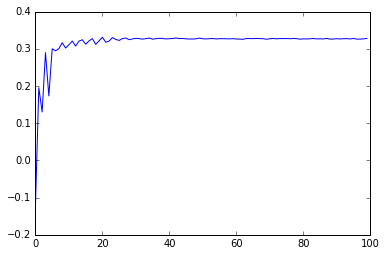

In [30]:
print T.reshape((3,4))
plt.plot(scores);
print max(scores), scores[-1]

# Export parameters and score plots

In [31]:
transform_parameters = {
    'parameters': aligner.Ts[-1],
    'centroid_m_wrt_wholebrain': aligner.centroid_m,
    'centroid_f_wrt_wholebrain': aligner.centroid_f
}

In [32]:
# transform_parameters = {
#     'parameters': aligner.Ts[-1],
#     'centroid_m': aligner.centroid_m,
#     'centroid_f': aligner.centroid_f,
#     'domain_m_origin_wrt_wholebrain': affine_aligner_parameters['volume_moving_origin_wrt_wholebrain'],
#     'domain_f_origin_wrt_wholebrain': affine_aligner_parameters['volume_fixed_origin_wrt_wholebrain']
# }

In [33]:
# for name_s in all_known_structures_sided:
# # for name_s in ['7N_L']:
    
#     try:
#         volume, bbox_wrt_fixedWholebrain = \
#             DataManager.load_transformed_volume_v2(alignment_spec=midsagittal_alignment_spec, 
#                                                    structure=name_s,
#                                                   resolution='10.0um',
#                                                   return_origin_instead_of_bbox=False)        
#     except:
#         sys.stderr.write("Cannot load moving brain for %s\n" % name_s)
#         continue
            
            
#     transformed_vol, transformed_vol_bbox_wrt_fixedWholebrain = transform_volume_by_alignment_parameters(volume, bbox=bbox_wrt_fixedWholebrain,
#                                                                                                         transform_parameters=transform_parameters)
#     print transformed_vol.shape, transformed_vol_bbox_wrt_fixedWholebrain
#     DataManager.save_transformed_volume(volume=transformed_vol, 
#                                         bbox=transformed_vol_bbox_wrt_fixedWholebrain, 
#                                         alignment_spec=affine_alignment_spec, 
#                                         resolution='%.1fum' % affine_aligner_parameters['resolution_um'], 
#                                         structure=name_s)

In [34]:
transform_matrix_affine = alignment_parameters_to_transform_matrix_v2(transform_parameters=transform_parameters)

In [35]:
transform_matrix_overall = compose_alignment_parameters([transform_matrix_affine, transform_parameters_midplane_aligned])

In [36]:
print transform_matrix_overall

[[  9.93007331e-01  -9.98860325e-02  -6.29278158e-02   1.14002680e+02]
 [  9.35895391e-02   9.90960293e-01  -9.61265722e-02  -3.02303695e+01]
 [  7.19608117e-02   8.95648897e-02   9.93379109e-01  -9.16395839e+01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


In [37]:
transform_parameters_overall = {'parameters': transform_matrix_overall[:3].flatten(),
                               'centroid_f_wrt_wholebrain': (0,0,0),
                               'centroid_m_wrt_wholebrain': (0,0,0)}

In [38]:
DataManager.save_alignment_results_v2(transform_parameters=transform_parameters_overall,
                       score_traj=scores,
                       parameter_traj=aligner.Ts,
                      alignment_spec=affine_alignment_spec)

aws s3 cp "/home/yuncong/CSHL_registration_parameters/MD585/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_parameters.json" "s3://mousebrainatlas-data/CSHL_registration_parameters/MD585/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_parameters.json"
0
aws s3 cp "/home/yuncong/CSHL_registration_parameters/MD585/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_scoreHistory.bp" "s3://mousebrainatlas-data/CSHL_registration_parameters/MD585/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_scoreHistory.bp"
0
aws s3 cp "/home/yuncong/CSH

In [46]:
for name_s in all_known_structures_sided:
    
    print name_s
    
    try:
        volume, origin_wrt_wholebrain = \
        DataManager.load_original_volume_v2(stack_spec=stack_m_spec, 
                                                   structure=name_s,
                                                  resolution='10.0um',
                                                  return_origin_instead_of_bbox=True)

    except:
        sys.stderr.write("Cannot load moving brain for %s\n" % name_s)
        continue
        
    transformed_volume, transformed_volume_bbox_wrt_fixedWholebrain = \
    transform_volume_v3(volume.astype(np.int), origin=origin_wrt_wholebrain,
                        transform_parameters=transform_matrix_overall)

#     vol_fp = DataManager.get_transformed_volume_filepath_v2(midsagittal_alignment_spec, structure=name_s)
#     create_parent_dir_if_not_exists(vol_fp)
#     bp.pack_ndarray_file(vol, vol_fp)
#     upload_to_s3(vol_fp)
    
#     bbox_fp = \
#     DataManager.get_transformed_volume_bbox_filepath_v2(midsagittal_alignment_spec, 
#                                                         structure=name_s, 
#                                                         wrt='fixedWholebrain')
#     create_parent_dir_if_not_exists(bbox_fp)
#     np.savetxt(bbox_fp, bbox_wrt_fixedWholebrain)
#     upload_to_s3(bbox_fp)
    
    DataManager.save_transformed_volume(volume=transformed_volume, 
                                        bbox=transformed_volume_bbox_wrt_fixedWholebrain, 
                                    alignment_spec=affine_alignment_spec, 
                                    resolution='%.1fum' % affine_aligner_parameters['resolution_um'], 
                                    structure=name_s)

5N_L
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD585/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um_5N_L.bp" "s3://mousebrainatlas-data/CSHL_volumes/MD585/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um_5N_L.bp"


Interpolating/filling sparse volume: 0.08 seconds.


0
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD585/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um_5N_L_bbox_wrt_fixedWholebrain.txt" "s3://mousebrainatlas-data/CSHL_volumes/MD585/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um_5N_L_bbox_wrt_fixedWholebrain.txt"
0
5N_R
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD585/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um_5N_R.bp" "s3://mousebrainatlas-data/CSHL_volumes/MD585/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD585_10.0um_annotation

Interpolating/filling sparse volume: 0.07 seconds.


0
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD585/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um_5N_R_bbox_wrt_fixedWholebrain.txt" "s3://mousebrainatlas-data/CSHL_volumes/MD585/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um_5N_R_bbox_wrt_fixedWholebrain.txt"
0
6N_L
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD585/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um_6N_L.bp" "s3://mousebrainatlas-data/CSHL_volumes/MD585/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD585_10.0um_annotation

Interpolating/filling sparse volume: 0.01 seconds.


0
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD585/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um_6N_L_bbox_wrt_fixedWholebrain.txt" "s3://mousebrainatlas-data/CSHL_volumes/MD585/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um_6N_L_bbox_wrt_fixedWholebrain.txt"
0
6N_R
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD585/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um_6N_R.bp" "s3://mousebrainatlas-data/CSHL_volumes/MD585/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD585_10.0um_annotation

Interpolating/filling sparse volume: 0.01 seconds.


0
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD585/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um_6N_R_bbox_wrt_fixedWholebrain.txt" "s3://mousebrainatlas-data/CSHL_volumes/MD585/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um_6N_R_bbox_wrt_fixedWholebrain.txt"
0
7N_L


Interpolating/filling sparse volume: 0.24 seconds.


aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD585/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um_7N_L.bp" "s3://mousebrainatlas-data/CSHL_volumes/MD585/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um_7N_L.bp"
0
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD585/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um_7N_L_bbox_wrt_fixedWholebrain.txt" "s3://mousebrainatlas-data/CSHL_volumes/MD585/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0u

Interpolating/filling sparse volume: 0.17 seconds.


0
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD585/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um_7N_R_bbox_wrt_fixedWholebrain.txt" "s3://mousebrainatlas-data/CSHL_volumes/MD585/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um_7N_R_bbox_wrt_fixedWholebrain.txt"
0
7n_L


Interpolating/filling sparse volume: 0.45 seconds.


aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD585/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um_7n_L.bp" "s3://mousebrainatlas-data/CSHL_volumes/MD585/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um_7n_L.bp"
0
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD585/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um_7n_L_bbox_wrt_fixedWholebrain.txt" "s3://mousebrainatlas-data/CSHL_volumes/MD585/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0u

Interpolating/filling sparse volume: 0.27 seconds.


aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD585/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um_7n_R.bp" "s3://mousebrainatlas-data/CSHL_volumes/MD585/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um_7n_R.bp"
0
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD585/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um_7n_R_bbox_wrt_fixedWholebrain.txt" "s3://mousebrainatlas-data/CSHL_volumes/MD585/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0u

Interpolating/filling sparse volume: 0.02 seconds.


0
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD585/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um_Amb_L_bbox_wrt_fixedWholebrain.txt" "s3://mousebrainatlas-data/CSHL_volumes/MD585/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um_Amb_L_bbox_wrt_fixedWholebrain.txt"
0
Amb_R
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD585/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um_Amb_R.bp" "s3://mousebrainatlas-data/CSHL_volumes/MD585/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD585_10.0um_annota

Interpolating/filling sparse volume: 0.02 seconds.


0
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD585/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um_Amb_R_bbox_wrt_fixedWholebrain.txt" "s3://mousebrainatlas-data/CSHL_volumes/MD585/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um_Amb_R_bbox_wrt_fixedWholebrain.txt"
0
LC_L
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD585/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um_LC_L.bp" "s3://mousebrainatlas-data/CSHL_volumes/MD585/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD585_10.0um_annotati

Interpolating/filling sparse volume: 0.05 seconds.


0
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD585/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um_LC_L_bbox_wrt_fixedWholebrain.txt" "s3://mousebrainatlas-data/CSHL_volumes/MD585/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um_LC_L_bbox_wrt_fixedWholebrain.txt"
0
LC_R
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD585/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um_LC_R.bp" "s3://mousebrainatlas-data/CSHL_volumes/MD585/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD585_10.0um_annotation

Interpolating/filling sparse volume: 0.05 seconds.


0
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD585/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um_LC_R_bbox_wrt_fixedWholebrain.txt" "s3://mousebrainatlas-data/CSHL_volumes/MD585/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um_LC_R_bbox_wrt_fixedWholebrain.txt"
0
LRt_L


Interpolating/filling sparse volume: 0.21 seconds.


aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD585/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um_LRt_L.bp" "s3://mousebrainatlas-data/CSHL_volumes/MD585/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um_LRt_L.bp"
0
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD585/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um_LRt_L_bbox_wrt_fixedWholebrain.txt" "s3://mousebrainatlas-data/CSHL_volumes/MD585/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10

Interpolating/filling sparse volume: 0.18 seconds.



0
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD585/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um_LRt_R_bbox_wrt_fixedWholebrain.txt" "s3://mousebrainatlas-data/CSHL_volumes/MD585/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um_LRt_R_bbox_wrt_fixedWholebrain.txt"
0
Pn_L


Interpolating/filling sparse volume: 0.23 seconds.


aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD585/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um_Pn_L.bp" "s3://mousebrainatlas-data/CSHL_volumes/MD585/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um_Pn_L.bp"
0
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD585/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um_Pn_L_bbox_wrt_fixedWholebrain.txt" "s3://mousebrainatlas-data/CSHL_volumes/MD585/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0u

Interpolating/filling sparse volume: 0.22 seconds.


aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD585/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um_Pn_R.bp" "s3://mousebrainatlas-data/CSHL_volumes/MD585/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um_Pn_R.bp"
0
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD585/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um_Pn_R_bbox_wrt_fixedWholebrain.txt" "s3://mousebrainatlas-data/CSHL_volumes/MD585/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0u

Interpolating/filling sparse volume: 0.07 seconds.


0
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD585/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um_Tz_L_bbox_wrt_fixedWholebrain.txt" "s3://mousebrainatlas-data/CSHL_volumes/MD585/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um_Tz_L_bbox_wrt_fixedWholebrain.txt"
0
Tz_R
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD585/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um_Tz_R.bp" "s3://mousebrainatlas-data/CSHL_volumes/MD585/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD585_10.0um_annotation

Interpolating/filling sparse volume: 0.07 seconds.


0
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD585/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um_Tz_R_bbox_wrt_fixedWholebrain.txt" "s3://mousebrainatlas-data/CSHL_volumes/MD585/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um_Tz_R_bbox_wrt_fixedWholebrain.txt"
0
VLL_L


Interpolating/filling sparse volume: 0.62 seconds.


aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD585/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um_VLL_L.bp" "s3://mousebrainatlas-data/CSHL_volumes/MD585/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um_VLL_L.bp"
0
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD585/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um_VLL_L_bbox_wrt_fixedWholebrain.txt" "s3://mousebrainatlas-data/CSHL_volumes/MD585/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10

Interpolating/filling sparse volume: 0.50 seconds.


aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD585/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um_VLL_R.bp" "s3://mousebrainatlas-data/CSHL_volumes/MD585/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um_VLL_R.bp"
0
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD585/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um_VLL_R_bbox_wrt_fixedWholebrain.txt" "s3://mousebrainatlas-data/CSHL_volumes/MD585/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10

Interpolating/filling sparse volume: 0.07 seconds.


0
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD585/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um_RMC_L_bbox_wrt_fixedWholebrain.txt" "s3://mousebrainatlas-data/CSHL_volumes/MD585/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um_RMC_L_bbox_wrt_fixedWholebrain.txt"
0
RMC_R
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD585/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um_RMC_R.bp" "s3://mousebrainatlas-data/CSHL_volumes/MD585/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD585_10.0um_annota

Interpolating/filling sparse volume: 0.14 seconds.


0
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD585/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um_RMC_R_bbox_wrt_fixedWholebrain.txt" "s3://mousebrainatlas-data/CSHL_volumes/MD585/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um_RMC_R_bbox_wrt_fixedWholebrain.txt"
0
SNC_L
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD585/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um_SNC_L.bp" "s3://mousebrainatlas-data/CSHL_volumes/MD585/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD585_10.0um_annota

Interpolating/filling sparse volume: 0.18 seconds.


0
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD585/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um_SNC_L_bbox_wrt_fixedWholebrain.txt" "s3://mousebrainatlas-data/CSHL_volumes/MD585/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um_SNC_L_bbox_wrt_fixedWholebrain.txt"
0
SNC_R


Interpolating/filling sparse volume: 0.21 seconds.


aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD585/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um_SNC_R.bp" "s3://mousebrainatlas-data/CSHL_volumes/MD585/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um_SNC_R.bp"
0
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD585/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um_SNC_R_bbox_wrt_fixedWholebrain.txt" "s3://mousebrainatlas-data/CSHL_volumes/MD585/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10

Interpolating/filling sparse volume: 0.64 seconds.


aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD585/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um_SNR_L.bp" "s3://mousebrainatlas-data/CSHL_volumes/MD585/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um_SNR_L.bp"
0
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD585/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um_SNR_L_bbox_wrt_fixedWholebrain.txt" "s3://mousebrainatlas-data/CSHL_volumes/MD585/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10

Interpolating/filling sparse volume: 0.84 seconds.


aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD585/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um_SNR_R.bp" "s3://mousebrainatlas-data/CSHL_volumes/MD585/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um_SNR_R.bp"
0
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD585/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um_SNR_R_bbox_wrt_fixedWholebrain.txt" "s3://mousebrainatlas-data/CSHL_volumes/MD585/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10

Interpolating/filling sparse volume: 0.06 seconds.


0
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD585/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um_3N_L_bbox_wrt_fixedWholebrain.txt" "s3://mousebrainatlas-data/CSHL_volumes/MD585/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um_3N_L_bbox_wrt_fixedWholebrain.txt"
0
3N_R
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD585/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um_3N_R.bp" "s3://mousebrainatlas-data/CSHL_volumes/MD585/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD585_10.0um_annotation

Interpolating/filling sparse volume: 0.05 seconds.


0
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD585/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um_3N_R_bbox_wrt_fixedWholebrain.txt" "s3://mousebrainatlas-data/CSHL_volumes/MD585/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um_3N_R_bbox_wrt_fixedWholebrain.txt"
0
4N_L
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD585/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um_4N_L.bp" "s3://mousebrainatlas-data/CSHL_volumes/MD585/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD585_10.0um_annotation

Interpolating/filling sparse volume: 0.02 seconds.


0
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD585/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um_4N_L_bbox_wrt_fixedWholebrain.txt" "s3://mousebrainatlas-data/CSHL_volumes/MD585/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um_4N_L_bbox_wrt_fixedWholebrain.txt"
0
4N_R
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD585/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um_4N_R.bp" "s3://mousebrainatlas-data/CSHL_volumes/MD585/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD585_10.0um_annotation

Interpolating/filling sparse volume: 0.01 seconds.


0
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD585/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um_4N_R_bbox_wrt_fixedWholebrain.txt" "s3://mousebrainatlas-data/CSHL_volumes/MD585/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um_4N_R_bbox_wrt_fixedWholebrain.txt"
0
Sp5I_L


Interpolating/filling sparse volume: 0.23 seconds.


aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD585/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um_Sp5I_L.bp" "s3://mousebrainatlas-data/CSHL_volumes/MD585/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um_Sp5I_L.bp"
0
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD585/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um_Sp5I_L_bbox_wrt_fixedWholebrain.txt" "s3://mousebrainatlas-data/CSHL_volumes/MD585/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD585_10.0um_annotationAsScoreVolume_warp109_MD589

Interpolating/filling sparse volume: 0.04 seconds.


0
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD585/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um_Sp5I_R_bbox_wrt_fixedWholebrain.txt" "s3://mousebrainatlas-data/CSHL_volumes/MD585/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um_Sp5I_R_bbox_wrt_fixedWholebrain.txt"
0
Sp5O_L


Interpolating/filling sparse volume: 0.30 seconds.


aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD585/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um_Sp5O_L.bp" "s3://mousebrainatlas-data/CSHL_volumes/MD585/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um_Sp5O_L.bp"
0
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD585/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um_Sp5O_L_bbox_wrt_fixedWholebrain.txt" "s3://mousebrainatlas-data/CSHL_volumes/MD585/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD585_10.0um_annotationAsScoreVolume_warp109_MD589

Interpolating/filling sparse volume: 0.17 seconds.


0
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD585/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um_Sp5O_R_bbox_wrt_fixedWholebrain.txt" "s3://mousebrainatlas-data/CSHL_volumes/MD585/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um_Sp5O_R_bbox_wrt_fixedWholebrain.txt"
0
Sp5C_L


Interpolating/filling sparse volume: 1.39 seconds.


aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD585/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um_Sp5C_L.bp" "s3://mousebrainatlas-data/CSHL_volumes/MD585/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um_Sp5C_L.bp"
0
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD585/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um_Sp5C_L_bbox_wrt_fixedWholebrain.txt" "s3://mousebrainatlas-data/CSHL_volumes/MD585/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD585_10.0um_annotationAsScoreVolume_warp109_MD589

File does not exist: /media/yuncong/YuncongPublic/CSHL_volumes/MD585/MD585_10.0um_annotationAsScoreVolume/score_volumes/MD585_10.0um_annotationAsScoreVolume_Sp5C_R.bp
Cannot load moving brain for Sp5C_R
Interpolating/filling sparse volume: 0.10 seconds.


0
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD585/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um_PBG_L_bbox_wrt_fixedWholebrain.txt" "s3://mousebrainatlas-data/CSHL_volumes/MD585/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um_PBG_L_bbox_wrt_fixedWholebrain.txt"
0
PBG_R
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD585/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um_PBG_R.bp" "s3://mousebrainatlas-data/CSHL_volumes/MD585/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD585_10.0um_annota

Interpolating/filling sparse volume: 0.07 seconds.


0
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD585/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um_PBG_R_bbox_wrt_fixedWholebrain.txt" "s3://mousebrainatlas-data/CSHL_volumes/MD585/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um_PBG_R_bbox_wrt_fixedWholebrain.txt"
0
10N_L
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD585/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um_10N_L.bp" "s3://mousebrainatlas-data/CSHL_volumes/MD585/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD585_10.0um_annota

Interpolating/filling sparse volume: 0.16 seconds.


0
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD585/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um_10N_L_bbox_wrt_fixedWholebrain.txt" "s3://mousebrainatlas-data/CSHL_volumes/MD585/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um_10N_L_bbox_wrt_fixedWholebrain.txt"
0
10N_R
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD585/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um_10N_R.bp" "s3://mousebrainatlas-data/CSHL_volumes/MD585/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD585_10.0um_annota

Interpolating/filling sparse volume: 0.10 seconds.


0
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD585/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um_10N_R_bbox_wrt_fixedWholebrain.txt" "s3://mousebrainatlas-data/CSHL_volumes/MD585/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um_10N_R_bbox_wrt_fixedWholebrain.txt"
0
VCA_L


Interpolating/filling sparse volume: 0.19 seconds.


aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD585/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um_VCA_L.bp" "s3://mousebrainatlas-data/CSHL_volumes/MD585/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um_VCA_L.bp"
0
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD585/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um_VCA_L_bbox_wrt_fixedWholebrain.txt" "s3://mousebrainatlas-data/CSHL_volumes/MD585/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10

Interpolating/filling sparse volume: 0.20 seconds.


aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD585/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um_VCA_R.bp" "s3://mousebrainatlas-data/CSHL_volumes/MD585/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um_VCA_R.bp"
0
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD585/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um_VCA_R_bbox_wrt_fixedWholebrain.txt" "s3://mousebrainatlas-data/CSHL_volumes/MD585/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10

Interpolating/filling sparse volume: 0.09 seconds.


0
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD585/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um_VCP_L_bbox_wrt_fixedWholebrain.txt" "s3://mousebrainatlas-data/CSHL_volumes/MD585/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um_VCP_L_bbox_wrt_fixedWholebrain.txt"
0
VCP_R
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD585/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um_VCP_R.bp" "s3://mousebrainatlas-data/CSHL_volumes/MD585/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD585_10.0um_annota

Interpolating/filling sparse volume: 0.16 seconds.


0
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD585/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um_VCP_R_bbox_wrt_fixedWholebrain.txt" "s3://mousebrainatlas-data/CSHL_volumes/MD585/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um_VCP_R_bbox_wrt_fixedWholebrain.txt"
0
DC_L


Interpolating/filling sparse volume: 0.19 seconds.


aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD585/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um_DC_L.bp" "s3://mousebrainatlas-data/CSHL_volumes/MD585/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um_DC_L.bp"
0
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD585/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um_DC_L_bbox_wrt_fixedWholebrain.txt" "s3://mousebrainatlas-data/CSHL_volumes/MD585/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0u

Interpolating/filling sparse volume: 0.24 seconds.


aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD585/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um_DC_R.bp" "s3://mousebrainatlas-data/CSHL_volumes/MD585/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um_DC_R.bp"
0
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD585/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um_DC_R_bbox_wrt_fixedWholebrain.txt" "s3://mousebrainatlas-data/CSHL_volumes/MD585/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0u

Interpolating/filling sparse volume: 0.03 seconds.


0
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD585/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um_AP_bbox_wrt_fixedWholebrain.txt" "s3://mousebrainatlas-data/CSHL_volumes/MD585/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um_AP_bbox_wrt_fixedWholebrain.txt"
0
12N
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD585/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um_12N.bp" "s3://mousebrainatlas-data/CSHL_volumes/MD585/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD585_10.0um_annotationAsScor

Interpolating/filling sparse volume: 0.16 seconds.


0
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD585/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um_12N_bbox_wrt_fixedWholebrain.txt" "s3://mousebrainatlas-data/CSHL_volumes/MD585/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um_12N_bbox_wrt_fixedWholebrain.txt"
0
RtTg


Interpolating/filling sparse volume: 0.49 seconds.


aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD585/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um_RtTg.bp" "s3://mousebrainatlas-data/CSHL_volumes/MD585/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um_RtTg.bp"
0
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD585/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um_RtTg_bbox_wrt_fixedWholebrain.txt" "s3://mousebrainatlas-data/CSHL_volumes/MD585/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0u

Interpolating/filling sparse volume: 5.53 seconds.


aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD585/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um_SC.bp" "s3://mousebrainatlas-data/CSHL_volumes/MD585/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um_SC.bp"
0
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD585/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um_SC_bbox_wrt_fixedWholebrain.txt" "s3://mousebrainatlas-data/CSHL_volumes/MD585/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_anno

Interpolating/filling sparse volume: 2.17 seconds.


aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD585/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um_IC.bp" "s3://mousebrainatlas-data/CSHL_volumes/MD585/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um_IC.bp"
0
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD585/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um_IC_bbox_wrt_fixedWholebrain.txt" "s3://mousebrainatlas-data/CSHL_volumes/MD585/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD585_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_anno